# Requirements

In [440]:
import pandas as pd
import missingno as msno
import numpy as np

In [441]:
# Add as many imports as you need.

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [442]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./obesity.csv")

Explore the dataset using visualizations of your choice.

In [443]:
# Write your code here. Add as many boxes as you need.

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [444]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()/len(df) *100

Unnamed: 0     0.000000
id            19.944118
Gender        19.867039
Age           19.992292
Height        19.708064
Weight        20.623374
FCVC          19.833317
NCP           19.563542
SMOKE         19.799595
CH2O          20.045284
FAF           19.939301
TUE           19.977840
MTRANS        20.030831
NObeyesdad    19.910396
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [445]:
df.dropna(subset=["FAF"],inplace=True,axis=0)

In [446]:
df["FAF"].isnull().sum()

0

In [447]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer


def showBP(data:pd.DataFrame):
    numerical_columns = data.select_dtypes(include=['number']).columns

    for column in numerical_columns:
        plt.figure(figsize=(6, 4))
        plt.boxplot(data[column], vert=False, patch_artist=True, showmeans=True)
        plt.title(f"Box Plot of {column}")
        plt.xlabel(column)
        plt.show()


def impute_knn(df:pd.DataFrame, columns:list, n_neighbors=5):
    df_copy = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_copy[columns])
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(scaled_data)
    imputed_data = scaler.inverse_transform(imputed_data)
    df_copy[columns] = imputed_data
    return df_copy

def impute_knn_for_categorical(df:pd.DataFrame, columns:list, n_neighbors=2):
    df_copy = df.copy()
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_copy[columns])
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(scaled_data)
    df_copy[columns] = imputed_data
    return df_copy


def label_encoder(dataframe: pd.DataFrame, columns: list) -> pd.DataFrame:
    df_copy = dataframe.copy()
    for column in columns:
        le = LabelEncoder()
        mask = df_copy[column].isnull()
        df_copy[column] = le.fit_transform(df_copy[column].astype(str))
        df_copy.loc[mask, column] = None
    return df_copy


def simple_imputor(dataframe: pd.DataFrame, strategy: str, columns) -> pd.DataFrame:
    df_copy = dataframe.copy()
    for column_name in columns:
        imputer = SimpleImputer(strategy=strategy)
        df_copy[column_name] = imputer.fit_transform(df_copy[[column_name]])
    return df_copy

def grouped_corr(df: pd.DataFrame):
    for cat in df.select_dtypes(include=['object', 'category']):
        for num in df.select_dtypes(include=['number']):
            print(cat+"--->"+num)
            print("####")
            print(df.groupby(cat)[num].mean())
            print("####")
            print()


import pandas as pd

def not_important(df: pd.DataFrame, target: str, thresh=0.2, precision=1e-4):
    not_important_attributes = list(df.columns)
    not_important_attributes.remove(target)
    
    corr_matrix = df.corr()
    
    for i in df.columns:
        for j in df.columns:
            if i == j:
                continue
            corr_value = corr_matrix[i][j]
            if abs(corr_value) < precision:
                continue
            if abs(corr_value) > thresh:
                if i in not_important_attributes:
                    not_important_attributes.remove(i)
                break
    
    return not_important_attributes

def cat_num_attrs(df):
    categorical_attributes = [col for col in df.columns if len(df[col].unique())<10]
    numerical_attributes = [col for col in df.columns if len(df[col].unique())>10]
    return categorical_attributes,numerical_attributes

In [448]:
qualitative,quantitative = cat_num_attrs(df)

In [449]:
df = label_encoder(df,qualitative)

<Axes: >

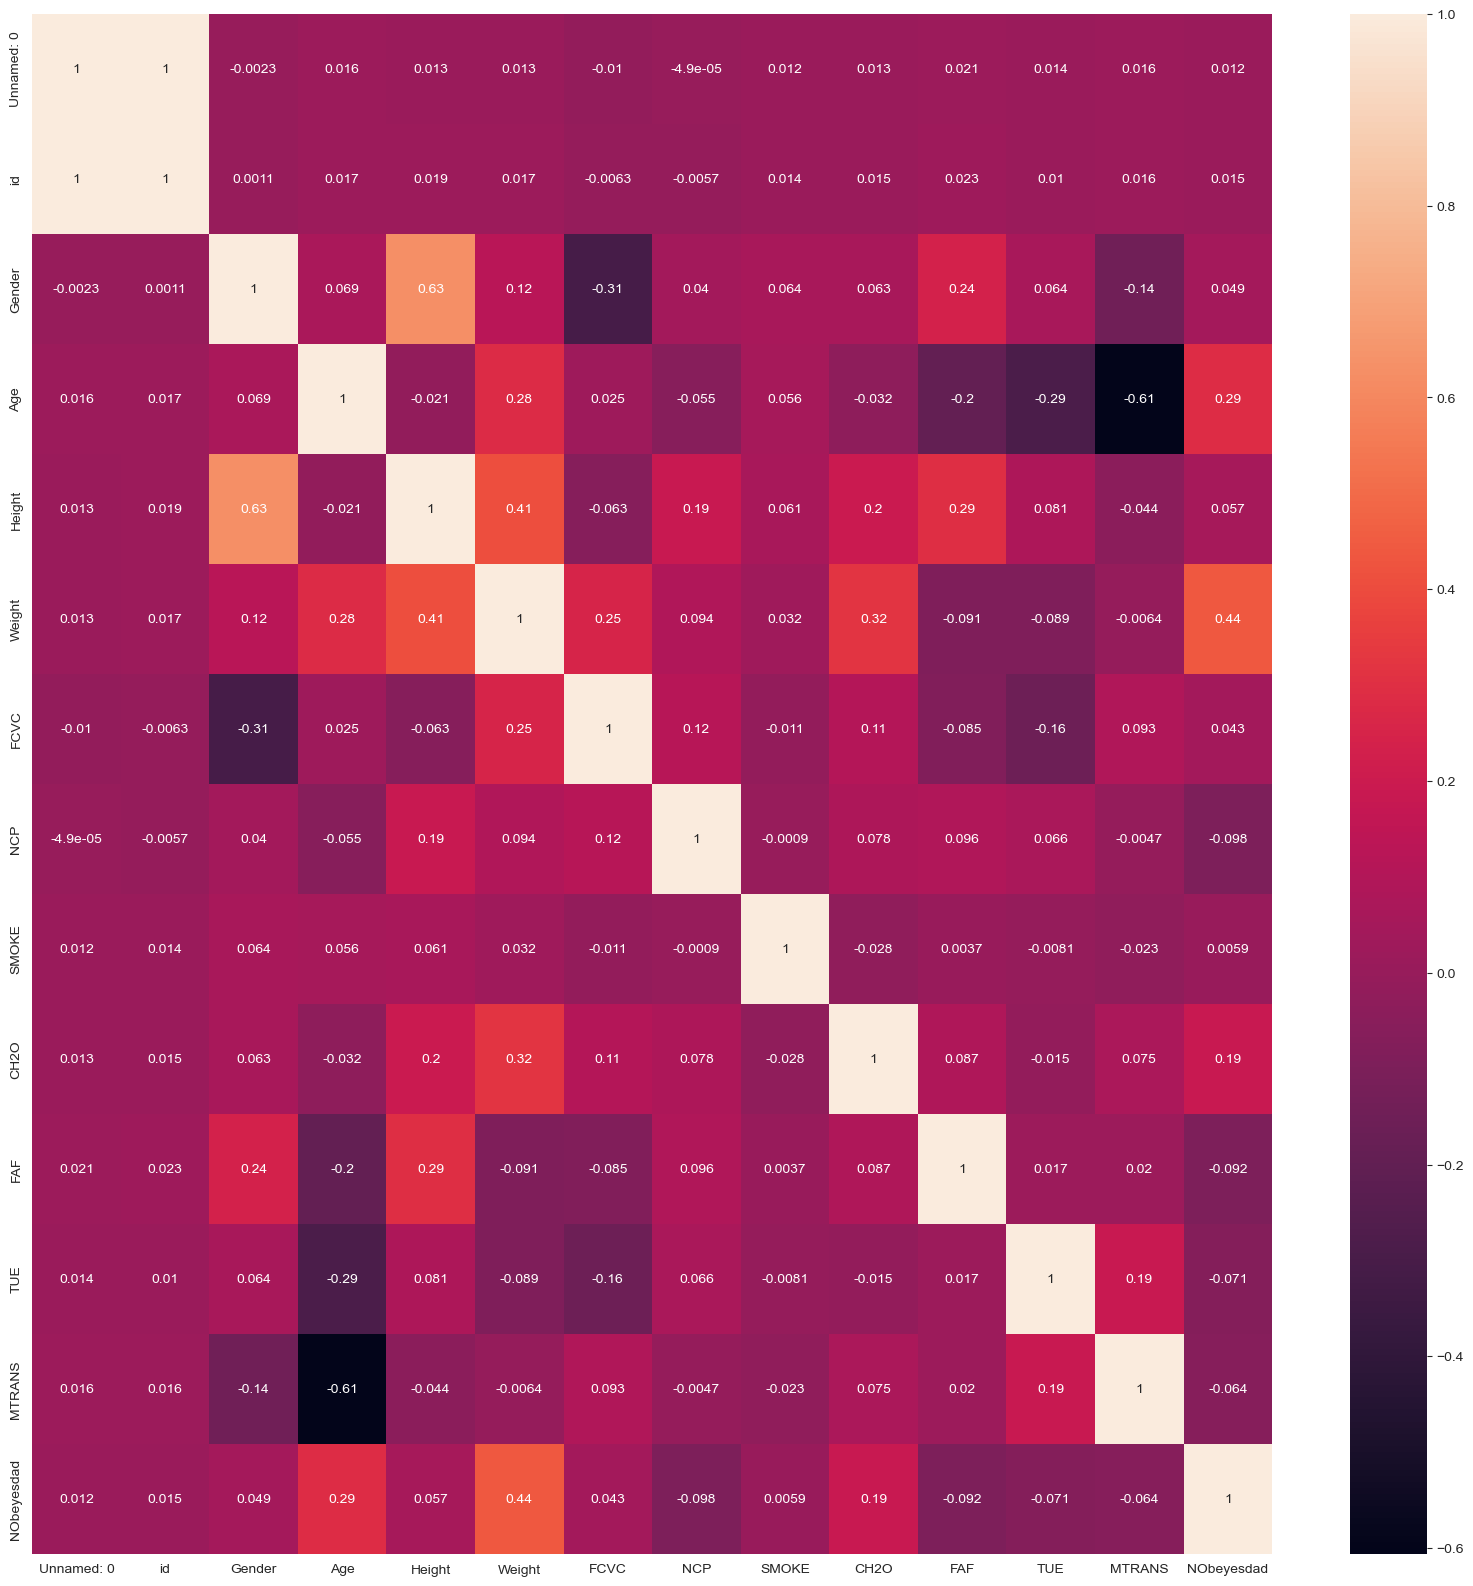

In [450]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [451]:
redundant = not_important(df,"FAF")
redundant.append("Unnamed: 0")
redundant.append("id")

In [452]:
df.drop(columns=redundant,axis=1,inplace=True)

In [453]:
qualitative,quantitative = cat_num_attrs(df)

In [454]:
cat_value_map = {}

for cat in qualitative:
    cat_value_map[cat] = list(df[cat].unique())

In [455]:
df.sample()

,Gender,Age,Height,Weight,FCVC,CH2O,FAF,TUE,MTRANS,NObeyesdad
16952,1.0,NaN,1.829907,118.102897,2.225149,2.104696,0.835271,0.0,3.0,3.0


In [456]:
df.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
CH2O          3338
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

<Axes: >

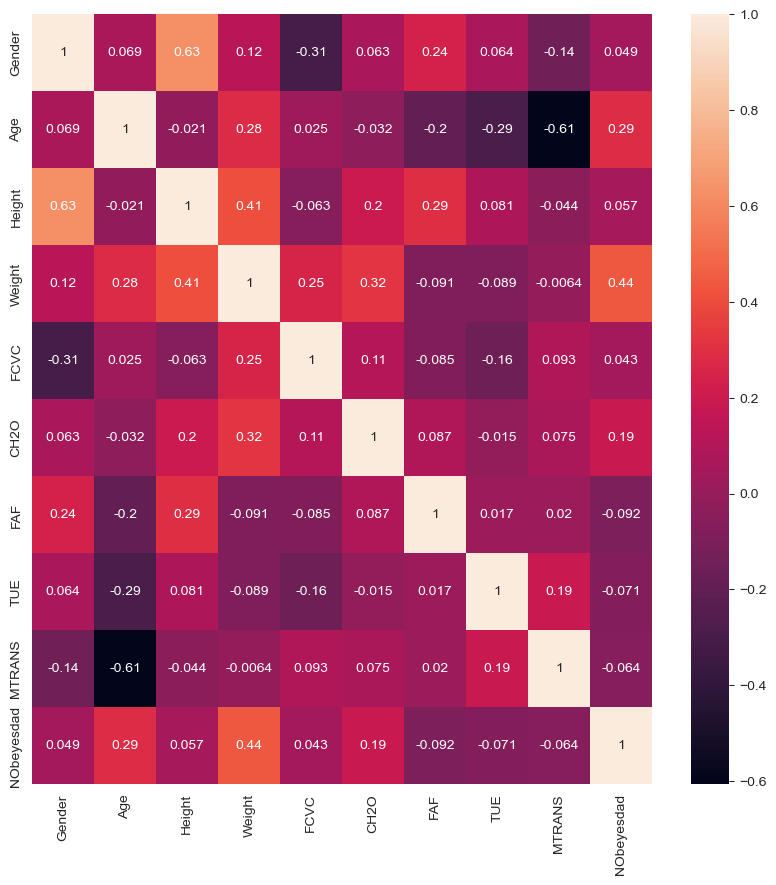

In [457]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [458]:
df.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
CH2O          3338
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'MTRANS'}>],
       [<Axes: title={'center': 'NObeyesdad'}>, <Axes: >, <Axes: >]],
      dtype=object)

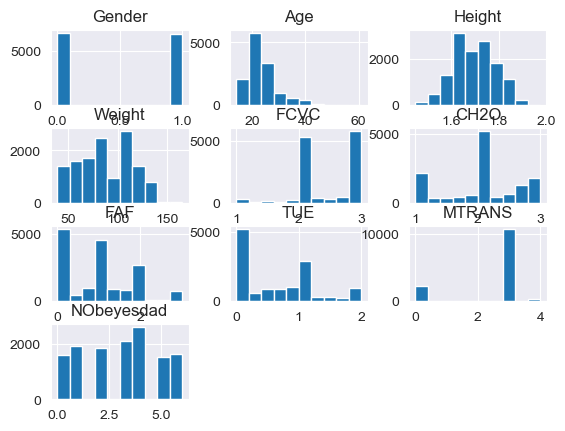

In [459]:
df.hist()

In [460]:
qualitative

['Gender', 'MTRANS', 'NObeyesdad']

In [461]:
df = simple_imputor(df,"mean",["CH2O"])

In [462]:
df.isnull().sum()

Gender        3305
Age           3308
Height        3262
Weight        3397
FCVC          3315
CH2O             0
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [463]:
df = impute_knn(df,["Gender","Height","Weight","FCVC"])

In [464]:
df.isnull().sum()

Gender           0
Age           3308
Height           0
Weight           0
FCVC             0
CH2O             0
FAF              0
TUE           3331
MTRANS        3381
NObeyesdad    3313
dtype: int64

In [465]:
df = impute_knn(df,["Age","MTRANS"])

In [466]:
df.isnull().sum()


Gender           0
Age              0
Height           0
Weight           0
FCVC             0
CH2O             0
FAF              0
TUE           3331
MTRANS           0
NObeyesdad    3313
dtype: int64

In [467]:
df = impute_knn(df,["Age","TUE"])

In [468]:
df.isnull().sum()


Gender           0
Age              0
Height           0
Weight           0
FCVC             0
CH2O             0
FAF              0
TUE              0
MTRANS           0
NObeyesdad    3313
dtype: int64

In [469]:
df = impute_knn(df,["NObeyesdad","Age","Weight"])

In [470]:
df.isnull().sum()


Gender        0
Age           0
Height        0
Weight        0
FCVC          0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [471]:
cat_value_map

{'Gender': [1.0, 0.0, nan],
 'MTRANS': [3.0, 0.0, nan, 4.0, 2.0, 1.0],
 'NObeyesdad': [nan, 0.0, 6.0, 3.0, 5.0, 1.0, 2.0, 4.0]}

In [472]:
df["Gender"] = df["Gender"].round()

In [478]:
df["MTRANS"] = df["MTRANS"].round()

In [482]:
df["NObeyesdad"] = df["NObeyesdad"].round()

In [483]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [484]:
X = df.drop(columns=["FAF"],axis=1)
Y = df["FAF"]


In [485]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)


In [488]:
len(Y.unique())

1291

## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [494]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import KFold, RepeatedKFold
from xgboost import XGBRegressor
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
rkf = RepeatedKFold(n_splits=5)
param_grid = {
    "objective" : ["reg:linear"],
    'learning_rate' : [0.001, 0.01, 0.1],
    'max_depth' : [4, 5, 6, 7],
    'alpha' : [2, 4, 6, 10]
}
model = XGBRegressor()

In [495]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    param_grid=param_grid,
    estimator=model,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [496]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/gorazdfilipovski/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:17:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/gorazdfilipovski/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:17:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/Users/gorazdfilipovski/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:17:32] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [2, 4, 6, 10],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [4, 5, 6, 7],
                         'objective': ['reg:linear']},
             scoring='r2', verbose=1)

In [497]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = grid_search.best_estimator_
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(predictions, Y_test))))
print(r2_score(Y_test, predictions))

Mean Absolute Error : 0.7064555854973832
0.3507015671435768


/Users/gorazdfilipovski/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:18:15] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [475]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [476]:
# Write your code here. Add as many boxes as you need.